<a href="https://colab.research.google.com/github/serahnjogu/Python-projects/blob/master/datacleaning_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing  libraries


In [ ]:
!pip install pyjanitor statsmodels
!pip install statsmodels

In [ ]:
import pandas as pd
import janitor
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import statsmodels.api as sm



# importing data set

In [ ]:
df= pd.read_excel(r"C:\Users\Serah\Downloads\Data_CW2.xlsx")
df=df.clean_names()
print (df.head())

   sale_id  sale_date  model_age  proximity_to_urban_centres  \
0        1   2013.650       38.6                  265.347718   
1        2   2012.350       19.5                 4077.055125   
2        3   2012.918       20.9                  937.831933   
3        4   2013.000       16.9                  179.732757   
4        5   2013.416       32.5                  190.054496   

   number_of_dealerships_nearby  vechicle_sale_price  
0                             6             41.98014  
1                             1             29.02716  
2                             5             58.83462  
3                             3             51.65586  
4                             7             66.32550  


c:\Users\Serah\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\Serah\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


# data cleaning process

In [ ]:
def decimal_year_date(decimal_year):
    year = int(decimal_year)
    start = datetime(year, 1, 1)
    end= datetime(year+1, 1, 1)
    days_in_year = (end - start).days
    frac = decimal_year - year
    return start +timedelta(days=int(frac*days_in_year))

df["sale_date"] = df["sale_date"].apply(decimal_year_date)


In [ ]:
df

,sale_id,sale_date,model_age,proximity_to_urban_centres,number_of_dealerships_nearby,vechicle_sale_price
0,1,2013-08-26,38.6,265.347718,6,41.98014
1,2,2012-05-08,19.5,4077.055125,1,29.02716
2,3,2012-12-01,20.9,937.831933,5,58.83462
3,4,2013-01-01,16.9,179.732757,3,51.65586
4,5,2013-06-01,32.5,190.054496,7,66.32550
...,...,...,...,...,...,...
434,435,2013-01-01,17.7,3964.985322,1,24.03324
435,436,2012-09-01,9.6,86.395962,10,78.03000
436,437,2013-04-02,22.8,378.404331,8,63.36036
437,438,2013-01-01,12.1,100.343752,6,81.93150


# missing variables


In [ ]:
df.isnull().sum()

sale_id                         0
sale_date                       0
model_age                       0
proximity_to_urban_centres      0
number_of_dealerships_nearby    0
vechicle_sale_price             0
dtype: int64

In [ ]:
df['sale_date_numeric'] = (df['sale_date'] - pd.Timestamp("2000-01-01")).dt.days

In [ ]:
X = df[['sale_date_numeric', 'model_age', 'proximity_to_urban_centres', 'number_of_dealerships_nearby']]
Y = df['vechicle_sale_price']
X = sm.add_constant(X)


# Linear Regression Model

In [ ]:

model = sm.OLS(Y, X).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     vechicle_sale_price   R-squared:                       0.558
Model:                             OLS   Adj. R-squared:                  0.554
Method:                  Least Squares   F-statistic:                     137.1
Date:                 Sun, 18 May 2025   Prob (F-statistic):           1.30e-75
Time:                         22:20:10   Log-Likelihood:                -1782.0
No. Observations:                  439   AIC:                             3574.
Df Residuals:                      434   BIC:                             3595.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 



## **1. Linear Regression Equation**

The general form of a multiple linear regression model is:

$$
\hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4
$$

Where:

* $\hat{Y}$: Predicted Vehicle Value
* $\beta_0$: Intercept (constant)
* $\beta_1$: Coefficient for Sale Date Numeric
* $\beta_2$: Coefficient for Model Age
* $\beta_3$: Coefficient for Proximity to Urban Centres
* $\beta_4$: Coefficient for Number of Dealerships Nearby

### Based on your results:

$$
\hat{Y} = -49.9112 + 0.0244 \times \text{SaleDateNumeric} - 0.4122 \times \text{ModelAge} - 0.0087 \times \text{ProximityToUrbanCentres} + 1.9834 \times \text{NumberOfDealershipsNearby}
$$

---

## **2. Interpretation of Coefficients**

| Variable                         | Coefficient | Interpretation                                                                                                                                                            |
| -------------------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Intercept (-49.9112)**         | -49.9112    | When all variables are zero, the baseline predicted vehicle value would be -49.9112 (theoretically, but often not meaningful practically if zero values are unrealistic). |
| **Sale Date Numeric (0.0244)**   | 0.0244      | For each unit increase in sale date (e.g., moving towards a more recent date), the vehicle value increases by **0.0244 units**, holding other factors constant.           |
| **Model Age (-0.4122)**          | -0.4122     | For each additional year of vehicle age, the value decreases by **0.4122 units**, holding other factors constant. Older cars are worth less.                              |
| **Proximity to Urban (-0.0087)** | -0.0087     | For each unit increase in distance from urban centers, vehicle value decreases by **0.0087 units**. Farther cars are less valuable.                                       |
| **Dealerships Nearby (1.9834)**  | 1.9834      | For each additional dealership nearby, vehicle value increases by **1.9834 units**, holding other factors constant. More dealerships drive up competition and demand.     |

---

## **3. Statistical Significance (p-values)**

* **Sale Date, Model Age, Proximity, Dealerships**: p-values < 0.05 → Statistically significant.
* **Intercept (p = 0.109)**: Not statistically significant.

---

## **4. Insights for Your Client**

* **Vehicle Age** and **Proximity to Urban Centers** have **negative effects** on vehicle price.
* **Sale Date (newer cars)** and **Dealerships Nearby** have **positive effects** on vehicle price.
* All factors except the intercept are statistically significant at the 5% level.
* Focus on dealership networks and urban proximity for strategic pricing.

---

### Final Summary for Client:

The linear regression model shows that newer models, vehicles closer to urban centers, and areas with more dealerships tend to have higher market values. Age significantly reduces value, while strategic dealership placement positively influences price. The model's predictors are statistically significant, providing reliable insights for your pricing strategies.


Your group manager questions whether the model may suffer from
potential heteroskedasticity and multicollinearity issues, but you do not agree. (a)
please briefly explain the concepts of heteroskedasticity and multicollinearity; (b) and
show evidence on why your results in Question 1 do not suffer from such issues; (c)
what are possible methods to address the issues of heteroskedasticity and
multicollinearity? (12 marks)

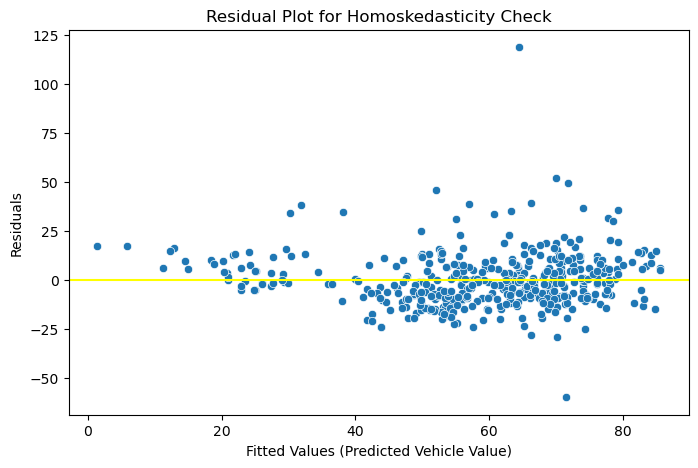

In [ ]:
# Extract fitted values and residuals from model
fitted_values = model.fittedvalues
residuals = model.resid

# Plot residuals vs fitted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='yellow', linestyle='-')  # horizontal zero line

plt.xlabel('Fitted Values (Predicted Vehicle Value)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoskedasticity Check')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF Calculation
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                        Feature          VIF
0                         const  2136.495410
1             sale_date_numeric     1.004112
2                     model_age     1.006417
3    proximity_to_urban_centres     1.586210
4  number_of_dealerships_nearby     1.587913


One of your colleagues suggests using a nonlinear model instead of a
linear model. Please analyse the data and evaluate whether a nonlinear model is a
better choice. (5 marks)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Define X and y
X = df[['sale_date_numeric', 'model_age', 'proximity_to_urban_centres', 'number_of_dealerships_nearby']]
y = df['vechicle_sale_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# 1. Linear Regression (Baseline)
linear_model = LinearRegression().fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# ----------------------------
# 2. Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression().fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# ----------------------------
# 3. Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

# ----------------------------
# 4. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
# 5. Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"Linear Regression     -> R²: {r2_linear:.4f}, RMSE: {rmse_linear:.2f}")
print(f"Polynomial Regression -> R²: {r2_poly:.4f}, RMSE: {rmse_poly:.2f}")
print(f"Decision Tree         -> R²: {r2_tree:.4f}, RMSE: {rmse_tree:.2f}")

Linear Regression     -> R²: 0.6043, RMSE: 11.58
Polynomial Regression -> R²: 0.6748, RMSE: 10.49
Decision Tree         -> R²: 0.5291, RMSE: 12.63
